In [1]:
# standard python imports
import numpy as np
import matplotlib.pylab as plt

# tidy3D import
import tidy3d as td
from tidy3d.constants import C_0
from tidy3d.plugins.mode import ModeSolver

import xarray as xr
td.config.logging_level = 'ERROR'

# size of simulation domain
Lx, Ly, Lz = 2, 2, 2
dl = 0.06667

# waveguide information
wg_width = 0.7
wg_permittivity = 3.47**2
plane_size = (4, 0, 3.5)

# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3

# run_time in ps
run_time = 1e-12

# automatic grid specification
# grid_spec = td.GridSpec.auto(min_steps_per_wvl=20, wavelength=wvl_um)
grid_spec = td.GridSpec.uniform(dl=dl)

plane = td.Box(center=(0, 0, 0), size=plane_size)
mode_spec = td.ModeSpec(
    num_modes=3,
)
freqs = [freq0]

def solve_one_width(wg_width, run_remote=False, custom=False):
    mesh = td.TriangleMesh.from_stl("./wg.stl", scale=(wg_width / 0.5, 1, 1))

    print("solve with: ", mesh.bounding_box)

    waveguide = td.Structure(
        geometry=mesh,
        medium=td.Medium(permittivity=wg_permittivity),
    
    )

    if custom:
        import custom.spatial_medium as sm
        sim = td.Simulation(
        size=(Lx, Ly, Lz),
        grid_spec=grid_spec,
        structures=[waveguide],
        run_time=run_time,
        boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
        medium=td.Medium(permittivity=1.444**2),
        )

        creator = sm.SpatialMediumCreator4(sim)
        medium, _ = creator.create()

        waveguide = td.Structure(
            geometry=mesh,
            medium = medium,
        )

    sim = td.Simulation(
        size=(Lx, Ly, Lz),
        grid_spec=grid_spec,
        structures=[waveguide],
        run_time=run_time,
        boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
        medium=td.Medium(permittivity=1.444**2),
        subpixel = run_remote
    )

    mode_solver = ModeSolver(
        simulation=sim,
        plane=plane,
        mode_spec=mode_spec,
        freqs=freqs,
    )
    if run_remote:
        from tidy3d.plugins.mode.web import run as run_mode_solver
        mode_data = run_mode_solver(mode_solver)
    else:
        mode_data = mode_solver.solve()
    return mode_data

solve by width

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.39999995231679997, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.46666661103626667, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5333332697557334, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5999999284752, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.6666665871946668, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.7333332459141334, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.7999999046336, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' cente

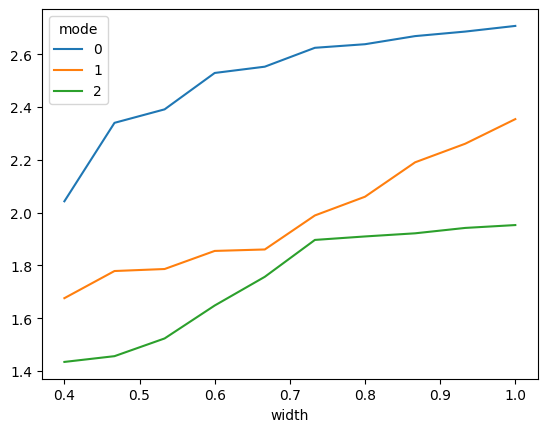

In [2]:
nums_width = 10
width = 0.3
widths = np.linspace(wg_width - width, wg_width + width, nums_width)
neffs = []
for w in widths:
    mode_data = solve_one_width(w)
    neffs.append(mode_data.n_eff.values[0])

da = xr.DataArray(neffs, coords={'width': widths, 'mode': np.arange(3)})
da.plot.line(x='width')


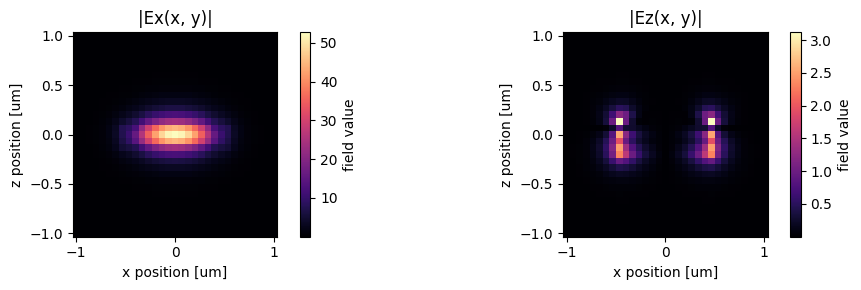

In [3]:
f0_ind = 0
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))
abs(mode_data.Ex.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ez.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax2, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ez(x, y)|")
ax2.set_aspect("equal")
plt.show()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.39999995231679997, 0.40000000596, 0.22000046074399998)


09:57:30 中国标准时间 Mode solver created with                                  
                      task_id='fdve-2eb6736b-c0a9-4a6d-af73-2e4a07aea45a',      
                      solver_id='mo-1959b01e-ff68-4057-b418-5a1c1f855fd0'.

Output()

Output()

09:57:36 中国标准时间 Mode solver status: queued

09:57:38 中国标准时间 Mode solver status: running

09:57:44 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.46666661103626667, 0.40000000596, 0.22000046074399998)


09:57:47 中国标准时间 Mode solver created with                                  
                      task_id='fdve-ac6d7765-190d-4e5c-9d95-b7f74596e57b',      
                      solver_id='mo-623f7684-d122-44ce-bc2b-4043039d1a3d'.

Output()

Output()

09:57:52 中国标准时间 Mode solver status: queued

09:57:54 中国标准时间 Mode solver status: running

09:58:01 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5333332697557334, 0.40000000596, 0.22000046074399998)


09:58:04 中国标准时间 Mode solver created with                                  
                      task_id='fdve-b2ff9480-c331-4ca2-8ff2-af63f7658cff',      
                      solver_id='mo-27910b62-ecfa-4406-9501-58aa1bca8b67'.

Output()

Output()

09:58:08 中国标准时间 Mode solver status: queued

09:58:09 中国标准时间 Mode solver status: running

09:58:17 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5999999284752, 0.40000000596, 0.22000046074399998)


09:58:20 中国标准时间 Mode solver created with                                  
                      task_id='fdve-221e86e3-ec68-4137-a5c2-8040d36501da',      
                      solver_id='mo-78c7881c-1bd7-4650-96b1-91fef3deb744'.

Output()

Output()

09:58:24 中国标准时间 Mode solver status: queued

09:58:25 中国标准时间 Mode solver status: running

09:58:32 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.6666665871946668, 0.40000000596, 0.22000046074399998)


09:58:35 中国标准时间 Mode solver created with                                  
                      task_id='fdve-4f240b6f-13a6-4d51-8df8-cd3434770e7b',      
                      solver_id='mo-6af91a46-73d5-43d8-8a0d-762195156724'.

Output()

Output()

09:58:40 中国标准时间 Mode solver status: queued

09:58:42 中国标准时间 Mode solver status: running

09:58:49 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.7333332459141334, 0.40000000596, 0.22000046074399998)


09:58:53 中国标准时间 Mode solver created with                                  
                      task_id='fdve-4913a0ea-f700-4f1e-938b-091f211bfea0',      
                      solver_id='mo-8246fa3a-e564-47cf-ab36-0c2f40998263'.

Output()

Output()

09:58:57 中国标准时间 Mode solver status: queued

09:58:58 中国标准时间 Mode solver status: running

09:59:06 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.7999999046336, 0.40000000596, 0.22000046074399998)


09:59:09 中国标准时间 Mode solver created with                                  
                      task_id='fdve-9e7f279b-e87f-42b6-999b-b65e016f2b13',      
                      solver_id='mo-8d878a88-2998-4b60-990b-0e007cfa1d98'.

Output()

Output()

09:59:13 中国标准时间 Mode solver status: queued

09:59:14 中国标准时间 Mode solver status: running

09:59:22 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.8666665633530667, 0.40000000596, 0.22000046074399998)


09:59:25 中国标准时间 Mode solver created with                                  
                      task_id='fdve-37da66e9-9f5c-405b-a8a3-ba5e890c4f95',      
                      solver_id='mo-0ab43d5e-d09c-4184-95b2-1b471dc65845'.

Output()

Output()

09:59:29 中国标准时间 Mode solver status: queued

09:59:31 中国标准时间 Mode solver status: running

09:59:38 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.9333332220725333, 0.40000000596, 0.22000046074399998)


09:59:41 中国标准时间 Mode solver created with                                  
                      task_id='fdve-195b023a-ef1b-4e90-a8ac-b487fa3cd92d',      
                      solver_id='mo-fe7aa6ce-d0a0-4473-9a05-fd9f9c4db608'.

Output()

Output()

09:59:45 中国标准时间 Mode solver status: queued

09:59:55 中国标准时间 Mode solver status: running

10:00:03 中国标准时间 Mode solver status: success

Output()

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.999999880792, 0.40000000596, 0.22000046074399998)


10:00:06 中国标准时间 Mode solver created with                                  
                      task_id='fdve-2c8655ef-8186-4445-b8a8-6821d0febdc8',      
                      solver_id='mo-4f0afabf-c514-4abe-89e6-c1750c1c9a8b'.

Output()

Output()

10:00:10 中国标准时间 Mode solver status: queued

10:00:12 中国标准时间 Mode solver status: running

10:00:19 中国标准时间 Mode solver status: success

Output()

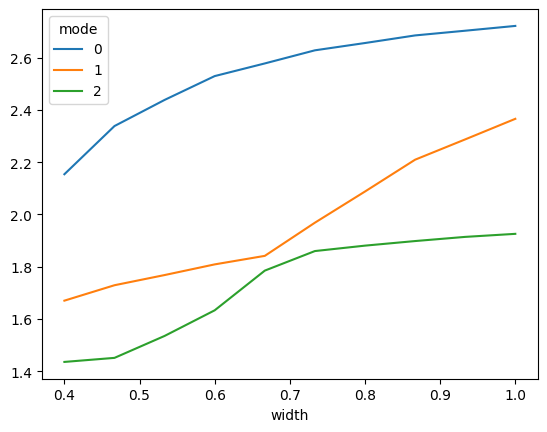

In [4]:
neffs = []
for w in widths:
    mode_data = solve_one_width(w, True)
    neffs.append(mode_data.n_eff.values[0])

da2 = xr.DataArray(neffs, coords={'width': widths, 'mode': np.arange(3)})
da2.plot.line(x='width')

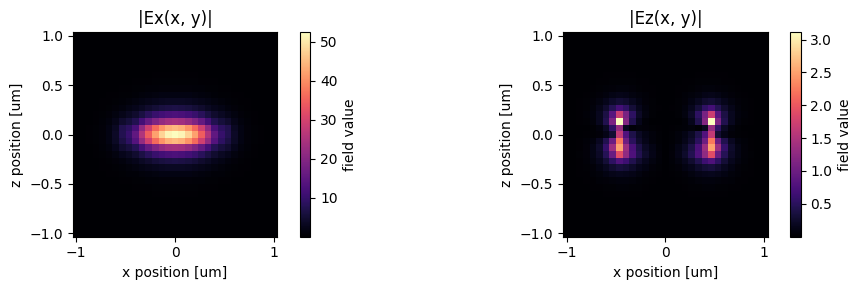

In [5]:
f0_ind = 0
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))
abs(mode_data.Ex.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ez.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax2, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ez(x, y)|")
ax2.set_aspect("equal")
plt.show()

tidy3d未使用subpixel与remote对比

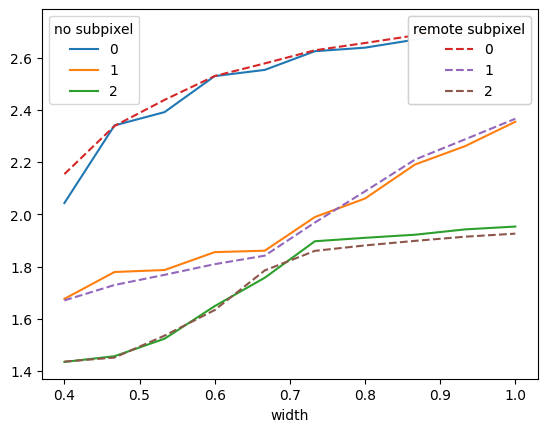

In [6]:
fig, ax = plt.subplots()
l1 = da.plot.line(x='width', ax=ax, add_legend=False)
for i in range(len(l1)):
    l1[i].set_label(i)
legend1 = ax.legend(handles=l1, title='no subpixel', loc='upper left')
ax.add_artist(legend1)
l2 = da2.plot.line(x='width', ax=ax, linestyle='--', add_legend=False)
for i in range(len(l2)):
    l2[i].set_label(i)
legend2 = ax.legend(handles=l2, title='remote subpixel', loc='upper right')
ax.add_artist(legend2)


In [ ]:
neffs = []
for w in widths:
    mode_data = solve_one_width(w, False, True)
    neffs.append(mode_data.n_eff.values[0])

da3 = xr.DataArray(neffs, coords={'width': widths, 'mode': np.arange(3)})
da3.plot.line(x='width')

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.39999995231679997, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 507.5397665
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.46666661103626667, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 463.32245939999996
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5333332697557334, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 539.6582821999998
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5999999284752, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 599.4409461999999
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.6666665871946668, 0.40000000596, 0.22000046074399998)
process tota

KeyboardInterrupt: 

: 

remote subpixel 与本地subpixel对比

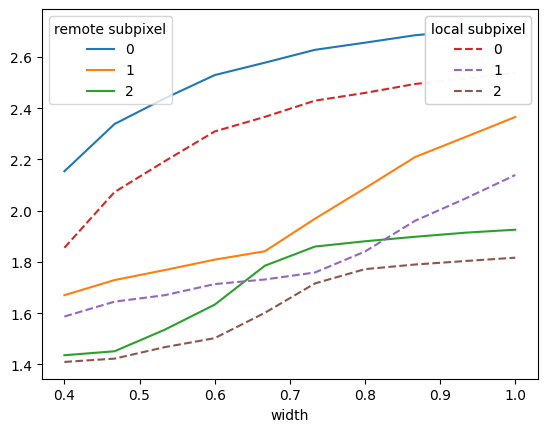

In [9]:
fig, ax = plt.subplots()
l1 = da2.plot.line(x='width', ax=ax, add_legend=False)
for i in range(len(l1)):
    l1[i].set_label(i)
legend1 = ax.legend(handles=l1, title='remote subpixel', loc='upper left')
ax.add_artist(legend1)
l2 = da3.plot.line(x='width', ax=ax, linestyle='--', add_legend=False)
for i in range(len(l2)):
    l2[i].set_label(i)
legend2 = ax.legend(handles=l2, title='local subpixel', loc='upper right')
ax.add_artist(legend2)